In [1]:
%matplotlib inline
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import boost_histogram as bh
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from lmfit.models import *
from lmfit import Model, Parameters

In [3]:
# read in reconstructed data
rec = pd.read_csv("yields_rga_mPim.csv", index_col=False )
rec = rec[(rec.mm2_mPim > -1.4)]
rec = rec[(rec.mm2_mPim < 1.4)]
# rec = rec[(rec.pim_mom_mPim > 6)]
# rec = rec[(rec.pim_mom_mPim < 8)]


#rec['cos_theta'] = np.cos(rec.pip_theta).astype(np.float32)
rec.head()

,pim_mom_mPim,mom_bins,pim_theta_mPim,theta_bins_before,theta_bins,pim_phi_mPim,phi_bins_before,phi_bins,mm2_mPim
2,3.90,3,7.3,0.41,0,160.0,1.33,1,1.20
3,5.90,5,7.9,0.44,0,300.0,2.50,2,-0.54
4,0.88,0,27.0,1.50,1,40.0,0.33,0,0.16
6,3.80,3,9.7,0.54,0,29.0,0.24,0,0.59
8,1.60,1,10.0,0.56,0,120.0,1.00,1,0.93


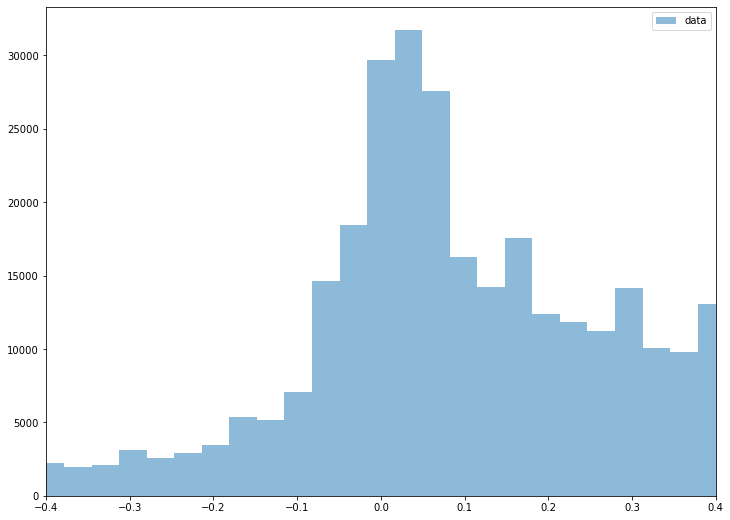

In [4]:

# plot W histogram

# Make a figure and axes to plot on
fig, ax = plt.subplots(figsize=(12,9))

# Plot hist on axes
ax.hist(rec.mm2_mPim, bins=79, alpha=0.5, label='data', density=False, )

# put legend on axes
ax.legend()
plt.xlim(-0.4, 0.4)

# Show figure
fig.show()

In [15]:
# Create function to
import sys
from scipy import integrate as intg
def mm_cut(df):
    NSIGMA = 4
    cut_data = {}
    for phi_val in range(3):
        for theta_val in range(10):
            s = '\u03B8 = (' + str(theta_val*18)+"-"+ str((theta_val+1)*18) +')\u00B0 and '+"\u03C6 = ("+str(phi_val*120)+'-'+str((phi_val+1)*120)+')\u00B0'
            # Seclect the data for the sector
            data = df[df.phi_bins == phi_val]
            data = df[df.theta_bins == theta_val]

            # Make a figure to plot on
            plt.figure(figsize=(12,9))
#         occurrences = np.count_nonzero(array == 2) ## count `2`'s
# print(occurrences)
            # Histogram the data and 
            y,x = np.histogram( data.mm2_mPim.to_numpy(), 
                                 bins=79, range=(-0.4,0.4), density=False)
        
            # calculate bin centers
            x=(x[1:]+x[:-1])/2

            # Plot points on
            plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

            # Make a model with a peak
            peak = BreitWignerModel(prefix="peak_")
            pars = peak.make_params()
            # Set some parameters
            pars['peak_center'].set(value=0, min=0.0, max=0.2)
            #pars['peak_sigma'].set(value=0.1, min=0.0, max=0.5)
            #pars['peak_amplitude'].set(value=0.5)
        
            # Set the background
            background =  PolynomialModel(2, prefix="back_")
            pars.update(background.guess(y, x=x))
            pars['back_c0'].set(value=0.1,min=0.)
        
            # Make full model to fit
            model = peak + background
        
            # Fit our full model
            out = model.fit(y, pars, x=x)
        
            # Make a more fine set of x's to plot with
            xs= np.linspace(-0.4, 0.4, 300)
        
            # Plot our output model withe the new parameter and finer x's
            plt.plot(xs, out.eval(params=out.params, x=xs), label='Total Fit')

            # Get the components of the fit for our finer x's
            comps = out.eval_components(x=xs)
            # Plot just the peak component
            plt.plot(xs, comps['peak_'], 
                         alpha=0.4, label=f"Peak Fit {out.params['peak_center'].value:0.4f},")
            plt.plot(xs, comps['back_'], 
                         alpha=0.4, label=f"Background Fit {out.params['back_c0'].value:0.4f}")
            # Plot center +- sigma where we will cut later
            #plt.axvline(out.params['peak_center']-NSIGMA*out.params['peak_sigma'])
            #plt.axvline(out.params['peak_center']+NSIGMA*out.params['peak_sigma'])
        
            # Put on labels and show the plot
#             plt.text(1, 1, 'phi_val = %1f ' % (phi_val))
#             plt.text(0.5, 0.5, 'theta_val = %1f' % (theta_val))
            plt.title(s)
            f = background # lambda x:exp(-x**2)
            TotalInt = intg.quad(f, -0.1, 0.11)
            print(TotalInt)
            print(out.fit_report(min_correl=0.5))
            plt.xlabel('MMSQ (GeV)')
#             plt.ylabel('Y')
            plt.legend()
            plt.show()
        
            # Save cut data to our
            cut_data [phi_val]= (out.params['peak_center']-NSIGMA*out.params['peak_sigma'], 
                         out.params['peak_center']+NSIGMA*out.params['peak_sigma'])
        
            
        

    return cut_data

ValueError: invalid callable given

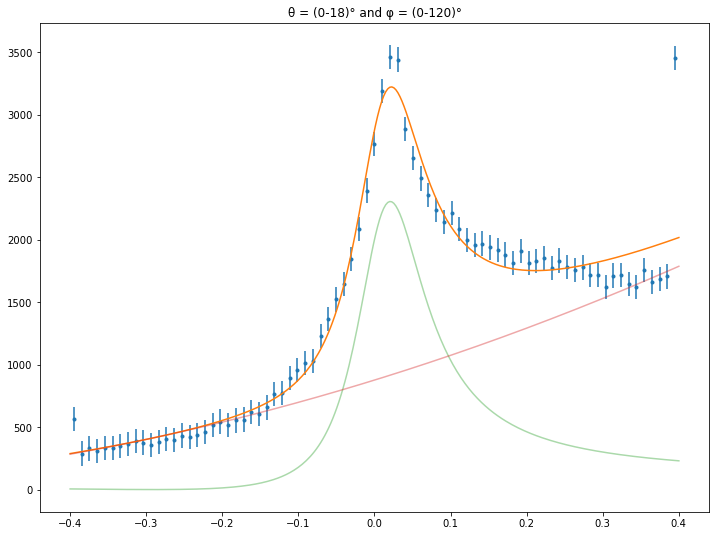

In [16]:
sector_cuts = mm_cut(rec)

KeyError: 'mmsq'

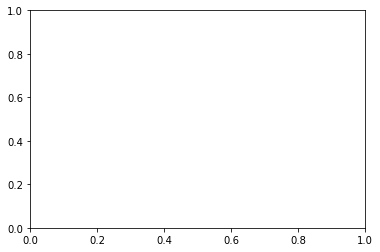

In [359]:
rec.plot(kind='scatter',x='mmsq',y='bin_content')
#rec.plot(kind='hist')
plt.xlim(-0.30, 0.30)
plt.show()

In [338]:
import scipy.integrate
from numpy import exp
f= lambda x:exp(-x**2)
i = scipy.integrate.quad(f, 0, 1)
print (i)

(0.7468241328124271, 8.291413475940725e-15)


In [6]:
import csv
with open('first_100.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('yields_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        myDictionary = {columns[4]:columns[5] for columns in reader}
        print(myDictionary.values())

dict_values(['bin_content', '73', '6', '9', '4', '9', '14', '11', '12', '10', '17', '22', '17', '16', '18', '28', '15', '29', '26', '21', '38', '29', '30', '17', '29', '38', '42', '35', '62', '47', '64', '79', '62', '72', '70', '91', '74', '111', '106', '110', '139', '169', '186', '193', '243', '245', '320', '384', '495', '653', '868', '1345', '1927', '2837', '3102', '2709', '2208', '1709', '1459', '1260', '1119', '947', '904', '853', '790', '800', '694', '699', '620', '631', '649', '591', '572', '635', '538', '559', '534', '580', '509', '507', '466', '507', '457', '453', '415', '418', '385', '379', '372', '390', '334', '312', '344', '277', '292', '271', '280', '262', '227', '257', '250'])


In [7]:
with open('first_100.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('yields_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        myDictionary = {columns[4]:columns[5] for columns in reader}
        print(myDictionary.keys())

dict_keys(['mmsq', '-0.4', '-0.392', '-0.384', '-0.376', '-0.368', '-0.36', '-0.352', '-0.344', '-0.336', '-0.328', '-0.32', '-0.312', '-0.304', '-0.296', '-0.288', '-0.28', '-0.272', '-0.264', '-0.256', '-0.248', '-0.24', '-0.232', '-0.224', '-0.216', '-0.208', '-0.2', '-0.192', '-0.184', '-0.176', '-0.168', '-0.16', '-0.152', '-0.144', '-0.136', '-0.128', '-0.12', '-0.112', '-0.104', '-0.096', '-0.088', '-0.08', '-0.072', '-0.064', '-0.056', '-0.048', '-0.04', '-0.032', '-0.024', '-0.016', '-0.00799999', '1.30385E-08', '0.00800001', '0.016', '0.024', '0.032', '0.04', '0.048', '0.056', '0.064', '0.072', '0.08', '0.088', '0.096', '0.104', '0.112', '0.12', '0.128', '0.136', '0.144', '0.152', '0.16', '0.168', '0.176', '0.184', '0.192', '0.2', '0.208', '0.216', '0.224', '0.232', '0.24', '0.248', '0.256', '0.264', '0.272', '0.28', '0.288', '0.296', '0.304', '0.312', '0.32', '0.328', '0.336', '0.344', '0.352', '0.36', '0.368', '0.376', '0.384', '0.392'])


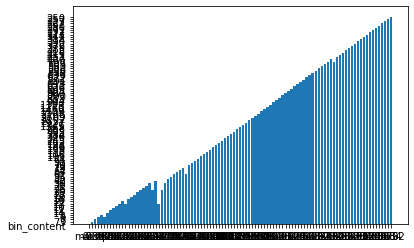

In [8]:
with open('first_100.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('yields_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        myDictionary = {columns[4]:columns[5] for columns in reader}
        plt.bar(list(myDictionary.keys()),myDictionary.values(),)
        plt.show()

No handles with labels found to put in legend.


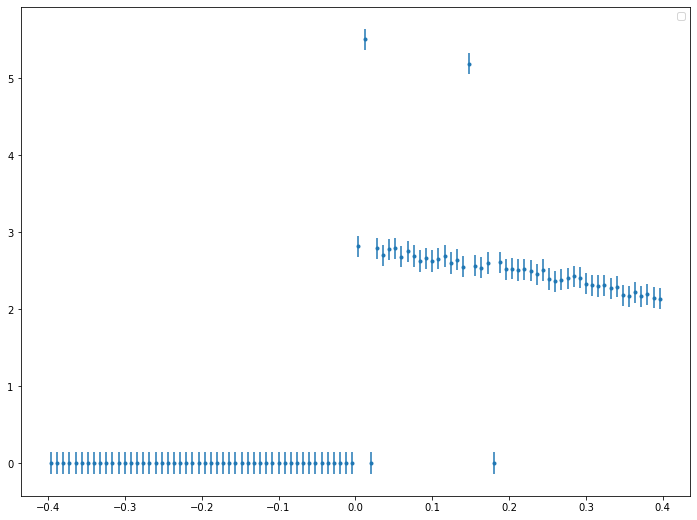

In [9]:
plt.figure(figsize=(12,9))
        
        # Histogram the data and 
y,x = np.histogram(rec.mmsq.to_numpy(), 
                                 bins=100, range=(-0.40,0.4), density=True)
        
        # calculate bin centers
x=(x[1:]+x[:-1])/2

        # Plot points on
plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)
           # Put on labels and show the plot
plt.legend()
plt.show()

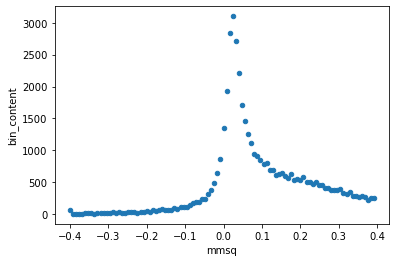

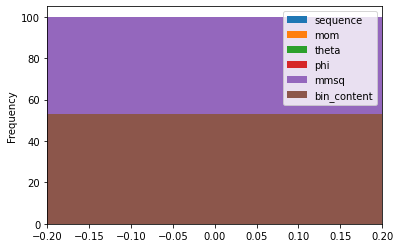

In [18]:
df  = pd.read_csv("first_100.csv")
df.plot(kind='scatter',x='mmsq',y='bin_content')
df.plot(kind='hist')
plt.xlim(-0.20, 0.20)
plt.show()

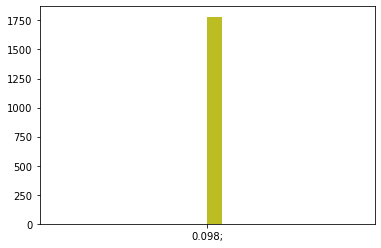

In [6]:
mom_val = {1, 2, 3, 5, 6, 7, 8, 9,10}
for i in mom_val:
#     if mom_val == int(rec.pim)
    plt.hist(rec.mm2_mPim,bins=20, range=(-0.20,0.2), density=False)
#     rec.plot(kind='scatter',x='mmsq',y='bin_content')
#     plt.xlim(-0.30, 0.30)

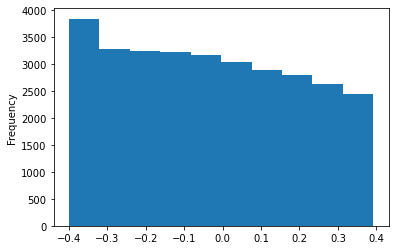

In [4]:
rec['mmsq'].plot(kind='hist');

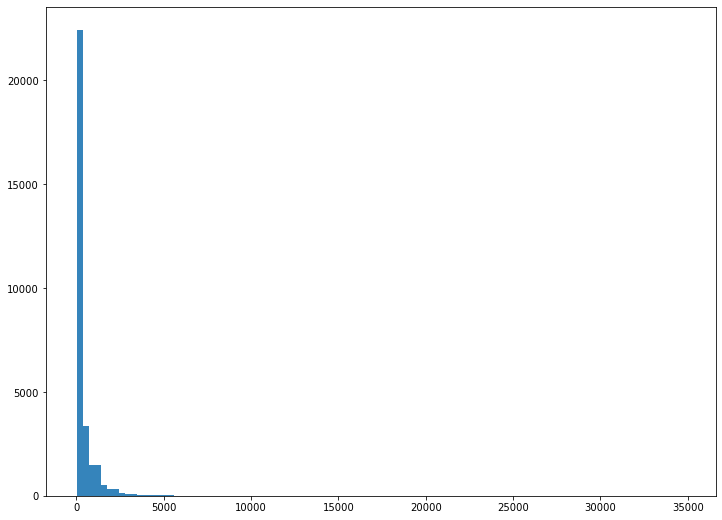

In [8]:

# plot W histogram

# Make a figure and axes to plot on
fig, ax = plt.subplots(figsize=(12,9))

# Plot hist on axes
ax.hist(rec.bin_content, bins=100, alpha=0.9, label='data', density=False, )

# put legend on axes
#ax.legend()

# Show figure
fig.show()

In [ ]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [32]:
# Create function to 
def mm_cut(df):
    NSIGMA = 4
    cut_data = {}
    phi_val = {45, 90, 135, 180, 225, 270, 315, 360}
    for sec in phi_val:
        # Seclect the data for the sector
        data = df[df.phi == sec]
        # Make a figure to plot on
        plt.figure(figsize=(12,9))
        
        # Histogram the data and 
        y,x = np.histogram( df.bin_content, 
                                 bins=100, range=(-0.2,0.2), density=False)
        
        # calculate bin centers
        x=(x[1:]+x[:-1])/2

        # Plot points on
        plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

        # Make a model with a peak
        peak = BreitWignerModel(prefix="peak_")
        pars = peak.make_params()
        # Set some parameters
        pars['peak_center'].set(value=1, min=0, max=1000)
        #pars['peak_sigma'].set(value=0.1, min=0.0, max=0.5)
        #pars['peak_amplitude'].set(value=0.5)
        
        # Set the background
        background =  PolynomialModel(5, prefix="back_")
        pars.update(background.guess(y, x=x))
        pars['back_c0'].set(value=0,min=0)
        
        # Make full model to fit
        model = peak + background
        
        # Fit our full model
        out = model.fit(y, pars, x=x)
        
        # Make a more fine set of x's to plot with
        xs= np.linspace(-0.2, 0.2, 100)
        
        # Plot our output model withe the new parameter and finer x's
        plt.plot(xs, out.eval(params=out.params, x=xs), label='Total Fit')

        # Get the components of the fit for our finer x's
        comps = out.eval_components(x=xs)
        # Plot just the peak component
        plt.plot(xs, comps['peak_'], 
                 alpha=0.4, label=f"Peak Fit {out.params['peak_center'].value:0.4f}")
        
        # Plot center +- sigma where we will cut later
        #plt.axvline(out.params['peak_center']-NSIGMA*out.params['peak_sigma'])
        #plt.axvline(out.params['peak_center']+NSIGMA*out.params['peak_sigma'])
        
        # Put on labels and show the plot
        plt.legend()
        plt.show()
        
        # Save cut data to our
        cut_data [sec]= (out.params['peak_center']-NSIGMA*out.params['peak_sigma'], 
                     out.params['peak_center']+NSIGMA*out.params['peak_sigma'])
        

    return cut_data

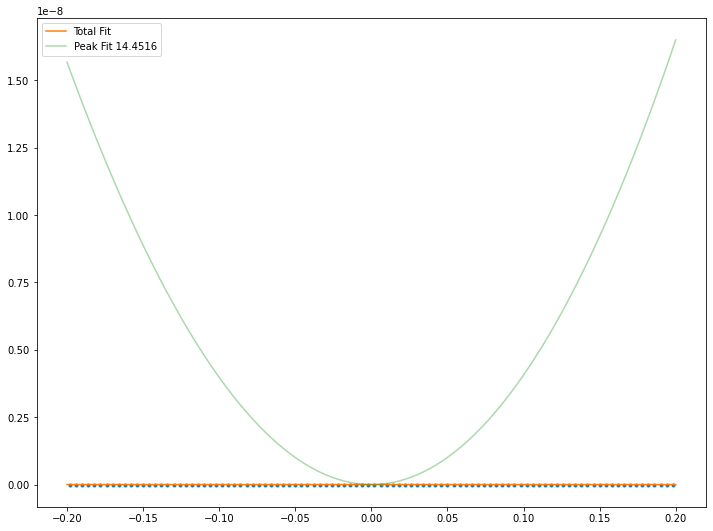

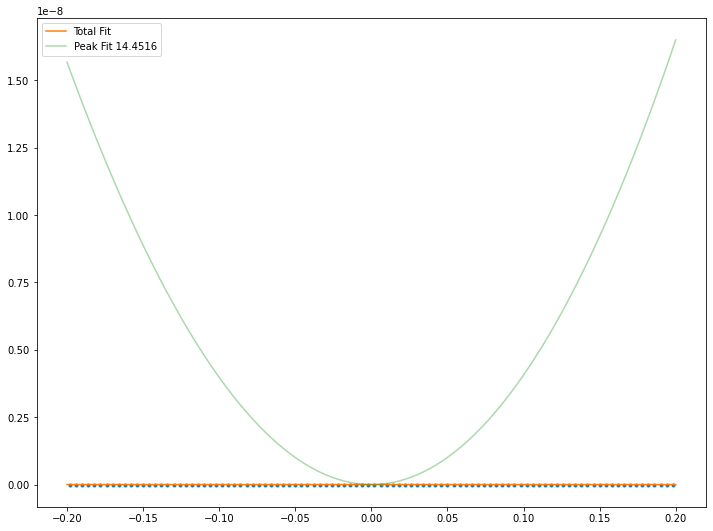

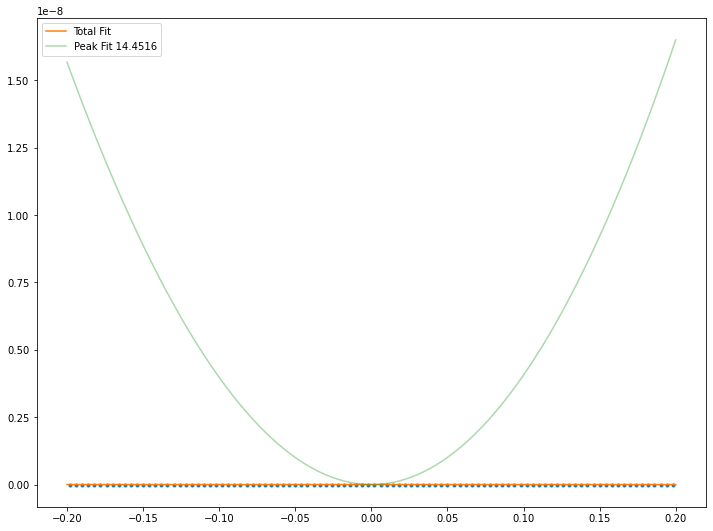

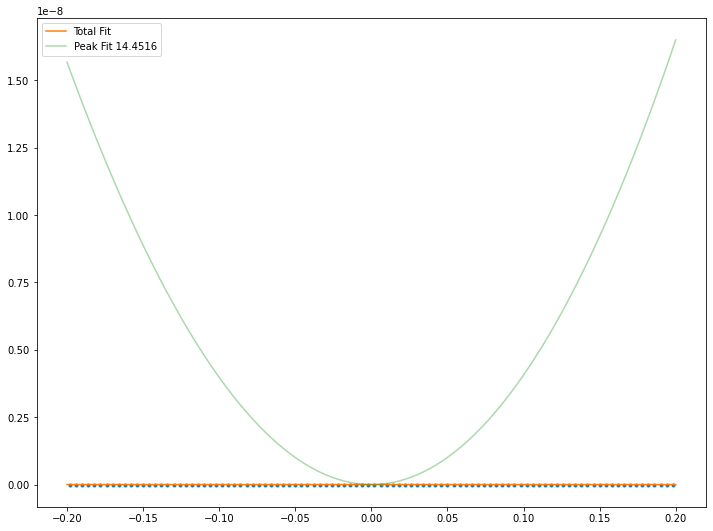

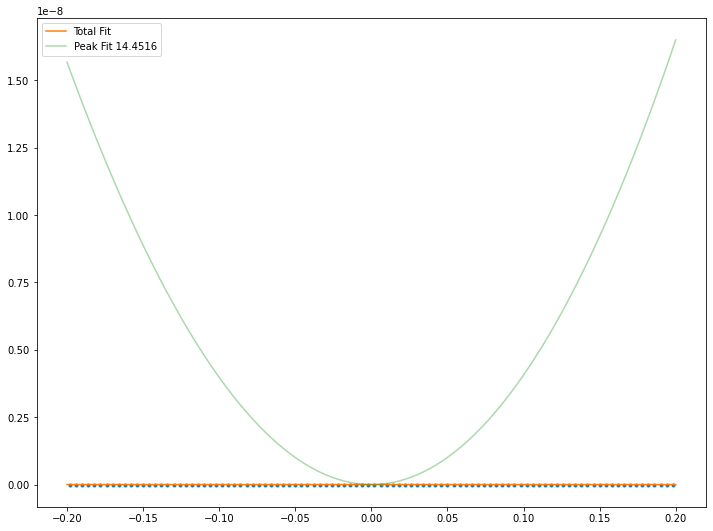

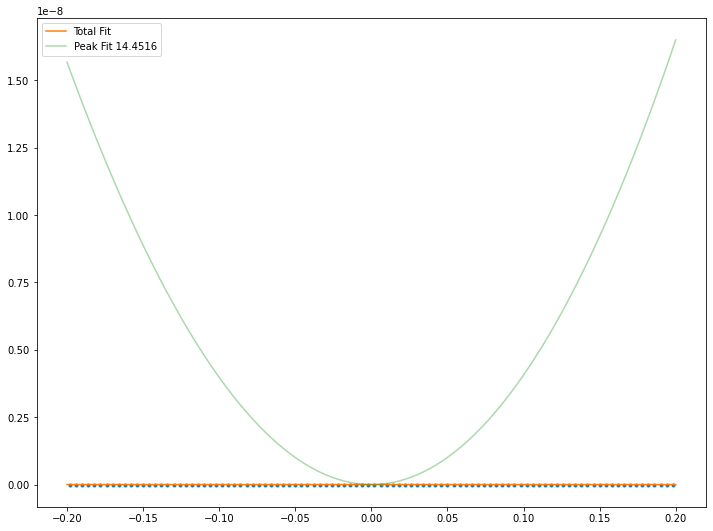

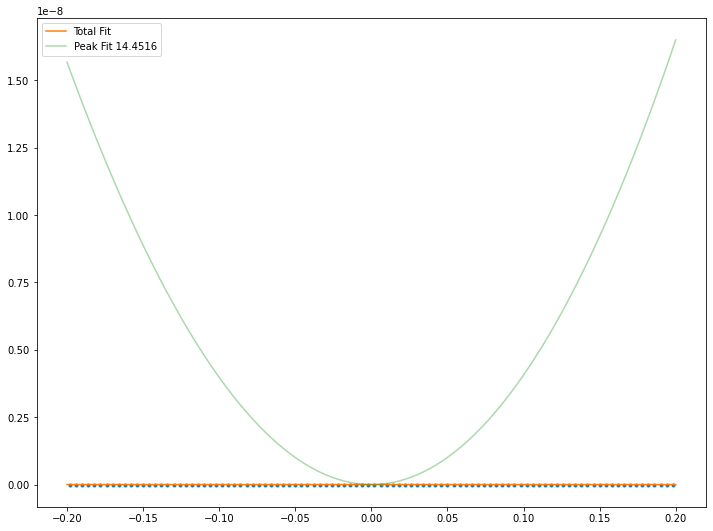

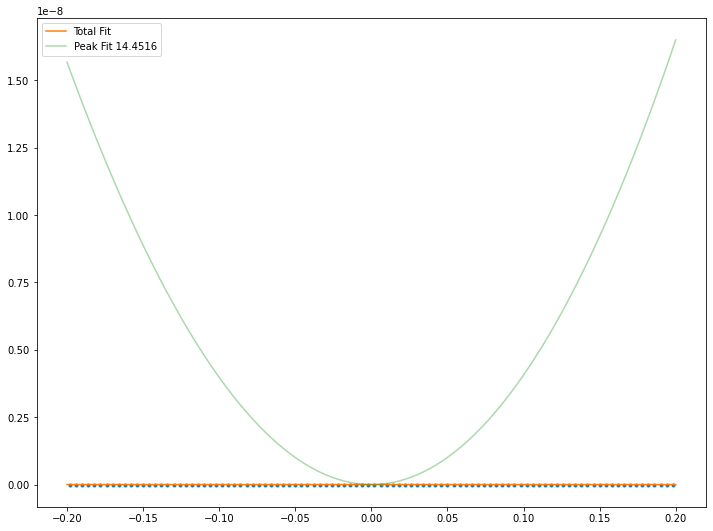

In [33]:
sector_cuts = mm_cut(rec)